In [38]:
#Importing Needed Packages and Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:

# Load the data
data = pd.read_csv("insurance.csv")

# Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['region', 'smoker', 'sex']
X_encoded = encoder.fit_transform(data[categorical_cols])


In [33]:

# Combine encoded features with numeric features
X = np.column_stack((X_encoded, data[['age', 'bmi', 'children']]))


In [41]:
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(input_features=categorical_cols))
encoded_df

C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1333,1.0,0.0,0.0,0.0,1.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,1.0,0.0,0.0,0.0
1336,0.0,0.0,1.0,0.0,0.0


In [34]:

# Target variable
y = data['charges']


In [35]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [36]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 33596915.85136148
R-squared: 0.7835929767120722


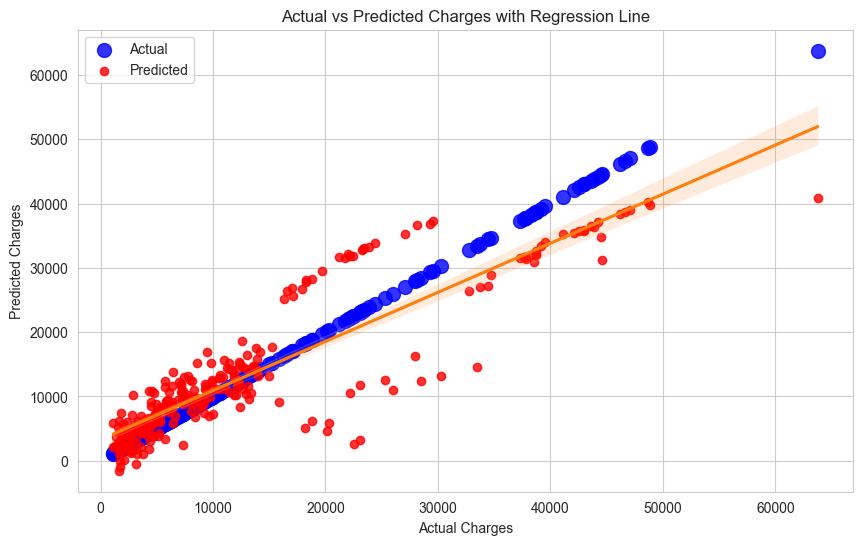

In [43]:

# Plot the results with a custom legend
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot actual data points in blue
sns.regplot(x=y_test, y=y_test, fit_reg=False, scatter_kws={"color": "blue", "s": 100}, label="Actual")

# Plot predicted data points in red
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "red"}, label="Predicted")

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges with Regression Line")
plt.legend()
plt.show()